# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [36]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import csv
import json
import scipy.stats as st
# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)


# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units= 'imperial'
count =0
sets = 1
cities_weather = []
latitude =[]
longitude = []
temp_max = []
humidity = []
cloudiness = []
wind = []
country = []
date = []


print ("Beginning Data Retrieval")
print("-------------------------------------")
for city in cities:
    try:
        time.sleep(1)
        query = f'{url}appid={weather_api_key}&q={city}&units={units}'
        response = requests.get(query).json()
        weather_data=(json.dumps(response, indent=4, sort_keys=True))
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        cloudiness.append(response['clouds']['all'])
        if count > 48:
            count =1
            sets +=1
            #cities_weather.append(response)
            cities_weather.append(city)
            
            #time.sleep(60)
            
        else:
            count+=1
            cities_weather.append(city)

        print(f"Processing Record {count} of Set {sets} | {response['name']}")
        #print(f"Processing Record {count} of Set {sets} | {city}")
    except:
        print ("City not found. Skipping....")
    #time.sleep(2)
print("------------------------------")
print("Data Retrieval Complete\n------------------------------")

Beginning Data Retrieval
-------------------------------------
Processing Record 1 of Set 1 | Mabaruma
Processing Record 2 of Set 1 | Ushuaia
Processing Record 3 of Set 1 | Prata
Processing Record 4 of Set 1 | Burē
City not found. Skipping....
Processing Record 5 of Set 1 | Katsuura
Processing Record 6 of Set 1 | Taltal
Processing Record 7 of Set 1 | Eagle Pass
City not found. Skipping....
Processing Record 8 of Set 1 | Naze
Processing Record 9 of Set 1 | Kavieng
Processing Record 10 of Set 1 | Višegrad
Processing Record 11 of Set 1 | Pitimbu
Processing Record 12 of Set 1 | Honiara
City not found. Skipping....
Processing Record 13 of Set 1 | Albany
City not found. Skipping....
Processing Record 14 of Set 1 | Ponta do Sol
Processing Record 15 of Set 1 | George Town
Processing Record 16 of Set 1 | Barrow
Processing Record 17 of Set 1 | New Norfolk
Processing Record 18 of Set 1 | Kysyl-Syr
Processing Record 19 of Set 1 | Raudeberg
Processing Record 20 of Set 1 | Saint George
Processing Re

Processing Record 38 of Set 4 | Swakopmund
Processing Record 39 of Set 4 | Krasnaya Polyana
Processing Record 40 of Set 4 | Esperance
Processing Record 41 of Set 4 | Lavrentiya
Processing Record 42 of Set 4 | Sovetskiy
Processing Record 43 of Set 4 | Clyde River
Processing Record 44 of Set 4 | Yayva
Processing Record 45 of Set 4 | Jiayuguan City
Processing Record 46 of Set 4 | Mayo
City not found. Skipping....
Processing Record 47 of Set 4 | Ayan
Processing Record 48 of Set 4 | Samarai
Processing Record 49 of Set 4 | Laem Sing
City not found. Skipping....
Processing Record 1 of Set 5 | Saint-Philippe
Processing Record 2 of Set 5 | Kloulklubed
Processing Record 3 of Set 5 | Kayerkan
Processing Record 4 of Set 5 | Peniche
Processing Record 5 of Set 5 | Saldanha
Processing Record 6 of Set 5 | Mackay
Processing Record 7 of Set 5 | Mosquera
Processing Record 8 of Set 5 | Tiksi
Processing Record 9 of Set 5 | Dhidhdhoo
Processing Record 10 of Set 5 | Żurrieq
Processing Record 11 of Set 5 | Ma

Processing Record 30 of Set 8 | Prince Rupert
Processing Record 31 of Set 8 | Okhotsk
Processing Record 32 of Set 8 | Bandarbeyla
Processing Record 33 of Set 8 | Sechura
Processing Record 34 of Set 8 | Heihe
Processing Record 35 of Set 8 | Ust-Tsilma
Processing Record 36 of Set 8 | Sal Rei
Processing Record 37 of Set 8 | Rameswaram
Processing Record 38 of Set 8 | Ji’an
Processing Record 39 of Set 8 | Severnyy-Kospashskiy
Processing Record 40 of Set 8 | Kenai
Processing Record 41 of Set 8 | Inuvik
Processing Record 42 of Set 8 | Olafsvik
Processing Record 43 of Set 8 | Humaitá
Processing Record 44 of Set 8 | Río Gallegos
Processing Record 45 of Set 8 | Cosautlán
Processing Record 46 of Set 8 | Reshetylivka
City not found. Skipping....
City not found. Skipping....
Processing Record 47 of Set 8 | Lukovetskiy
Processing Record 48 of Set 8 | Warner Robins
Processing Record 49 of Set 8 | Hambantota
Processing Record 1 of Set 9 | Tandil
City not found. Skipping....
Processing Record 2 of Set 

Processing Record 17 of Set 12 | Nushki
Processing Record 18 of Set 12 | Yinchuan
Processing Record 19 of Set 12 | Athabasca
Processing Record 20 of Set 12 | Ecuandureo
------------------------------
Data Retrieval Complete
------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
#print (response)
# print (weather_data)
# testing =pd.DataFrame(cities_weather)
# testing
weather_data={"city": cities_weather,
             "Lat": latitude,
             "Lng": longitude,
             "Max Temp": temp_max,
             "Humidity": humidity,
             "Cloudiness": cloudiness,
             "Wind Speed": wind,
             "Country": country,
             "Date": date}
weather_data

{'city': ['mabaruma',
  'ushuaia',
  'prata',
  'bure',
  'katsuura',
  'taltal',
  'eagle pass',
  'naze',
  'kavieng',
  'visegrad',
  'pitimbu',
  'honiara',
  'albany',
  'ponta do sol',
  'georgetown',
  'barrow',
  'new norfolk',
  'kysyl-syr',
  'raudeberg',
  'saint george',
  'lumut',
  'thompson',
  'rikitea',
  'acarau',
  'tilichiki',
  'kapaa',
  'kindu',
  'vitim',
  'bluff',
  'provideniya',
  'upernavik',
  'puerto ayora',
  'castro',
  'haimen',
  'mataura',
  'cape town',
  'hasaki',
  'obo',
  'chokurdakh',
  'hilo',
  'visby',
  'tay ninh',
  'vostok',
  'garowe',
  'avarua',
  'punta arenas',
  'busselton',
  'sorong',
  'avera',
  'carnarvon',
  'hofn',
  'talnakh',
  'victoria',
  'broken hill',
  'camacha',
  'fort frances',
  'college',
  'nikolskoye',
  'constitucion',
  'port alfred',
  'lensk',
  'hithadhoo',
  'kruisfontein',
  'sortland',
  'mecca',
  'vaini',
  'tawang',
  'sabang',
  'la libertad',
  'chuy',
  'butaritari',
  'bonavista',
  'calatrava',


In [9]:
#dataframe
#weather_data = pd.DataFrame(weather_data)
weather = pd.DataFrame.from_dict(weather_data)
weather

,city,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mabaruma,8.20,-59.78,86.83,71,6,4.50,GY,1596989795
1,ushuaia,-54.80,-68.30,41.00,56,75,24.16,AR,1596989796
2,prata,-19.31,-48.92,82.85,27,0,8.28,BR,1596989797
3,bure,10.70,37.07,58.69,94,94,1.66,ET,1596989799
4,katsuura,35.13,140.30,82.00,84,100,1.99,JP,1596989801
...,...,...,...,...,...,...,...,...,...
554,tautira,-17.73,-149.15,77.00,50,40,6.93,PF,1596990457
555,nushki,29.55,66.02,85.86,50,30,8.34,PK,1596990458
556,yinchuan,38.47,106.27,80.17,30,22,2.53,CN,1596990459
557,athabasca,54.72,-113.29,60.13,56,1,17.49,CA,1596990460


In [10]:
#cities with humidity over 100% === NONE!!!!!!
humidity= weather[weather['Humidity']>100]
humidity

,city,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

# NO CITY WITH HUMIDITY > 100%

In [11]:
#  Get the indices of cities that have humidity over 100%.


In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [16]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
weatherpy = weather.to_csv("../outputs/weather.csv")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

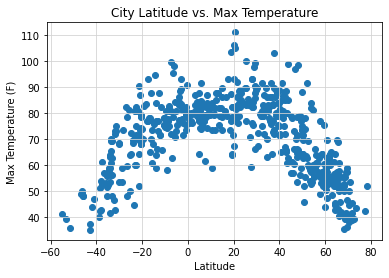

In [17]:

plt.scatter(weather["Lat"],weather["Max Temp"])
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../outputs/latVtemp.png")
plt.show()

## Latitude vs. Humidity Plot

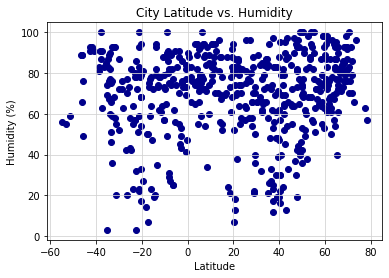

In [18]:
plt.scatter(weather["Lat"],weather["Humidity"], facecolors= "darkblue")
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../outputs/latVhum.png")
plt.show()

## Latitude vs. Cloudiness Plot

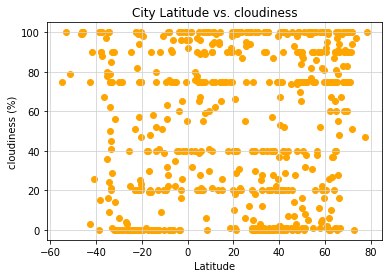

In [19]:
plt.scatter(weather["Lat"],weather["Cloudiness"], facecolors= "orange")
plt.title("City Latitude vs. cloudiness")
plt.xlabel("Latitude")
plt.ylabel("cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../outputs/latVcloud.png")
plt.show()

## Latitude vs. Wind Speed Plot

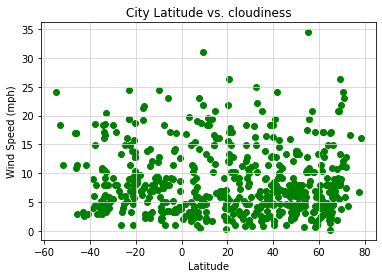

In [20]:
plt.scatter(weather["Lat"],weather["Wind Speed"], facecolors= "green")
plt.title("City Latitude vs. cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../outputs/latVwindSpeed.png")
plt.show()

## Linear Regression

In [21]:
# OPTIONAL: Create a function to create Linear Regression plots

In [22]:
# Create Northern and Southern Hemisphere DataFrames
weather['Hemisphere'] =np.where(weather['Lat']>=0, "Northern Hemisphere", "Southern Hemisphere")
weather

,city,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Hemisphere
0,mabaruma,8.20,-59.78,86.83,71,6,4.50,GY,1596989795,Northern Hemisphere
1,ushuaia,-54.80,-68.30,41.00,56,75,24.16,AR,1596989796,Southern Hemisphere
2,prata,-19.31,-48.92,82.85,27,0,8.28,BR,1596989797,Southern Hemisphere
3,bure,10.70,37.07,58.69,94,94,1.66,ET,1596989799,Northern Hemisphere
4,katsuura,35.13,140.30,82.00,84,100,1.99,JP,1596989801,Northern Hemisphere
...,...,...,...,...,...,...,...,...,...,...
554,tautira,-17.73,-149.15,77.00,50,40,6.93,PF,1596990457,Southern Hemisphere
555,nushki,29.55,66.02,85.86,50,30,8.34,PK,1596990458,Northern Hemisphere
556,yinchuan,38.47,106.27,80.17,30,22,2.53,CN,1596990459,Northern Hemisphere
557,athabasca,54.72,-113.29,60.13,56,1,17.49,CA,1596990460,Northern Hemisphere


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.72


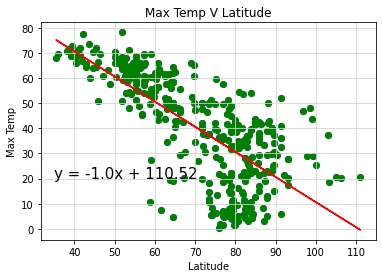

In [23]:
northern= weather[weather['Hemisphere']=="Northern Hemisphere"]
x_values = northern['Max Temp']
y_values = northern['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(35,20),fontsize=15,color="black")
correlation = st.pearsonr(x_values,y_values)
plt.scatter(northern["Max Temp"],northern["Lat"], facecolors= "green")
plt.title("Max Temp V Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../outputs/maxTemp_lat.png")
print (f"The r-squared is: {round(correlation[0],2)}")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.77


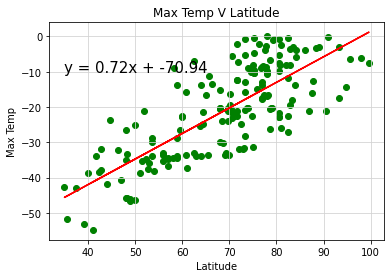

In [24]:
southern= weather[weather['Hemisphere']=="Southern Hemisphere"]
x_values = southern['Max Temp']
y_values = southern['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, facecolors= "green")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(35,-10),fontsize=15,color="black")
correlation = st.pearsonr(x_values,y_values)

plt.title("Max Temp V Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../outputs/maxTemp_lat.png")
print (f"The r-squared is: {round(correlation[0],2)}")
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.05


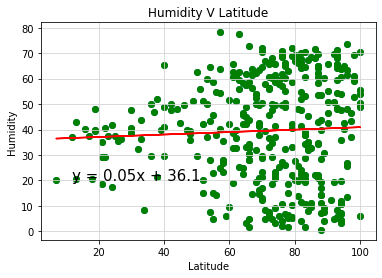

In [25]:
northern= weather[weather['Hemisphere']=="Northern Hemisphere"]
x_values = northern['Humidity']
y_values = northern['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(12,20),fontsize=15,color="black")
correlation = st.pearsonr(x_values,y_values)
plt.scatter(northern["Humidity"],northern["Lat"], facecolors= "green")
plt.title("Humidity V Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../outputs/maxTemp_lat.png")
print (f"The r-squared is: {round(correlation[0],2)}")
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.09


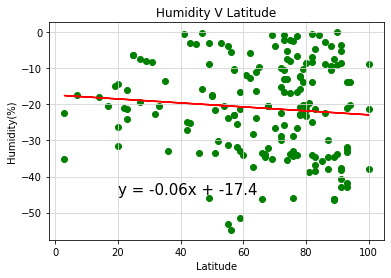

In [26]:
southern= weather[weather['Hemisphere']=="Southern Hemisphere"]
x_values = southern['Humidity']
y_values = southern['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, facecolors= "green")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,-45),fontsize=15,color="black")
correlation = st.pearsonr(x_values,y_values)

plt.title("Humidity V Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../outputs/Humidity_S_lat.png")
print (f"The r-squared is: {round(correlation[0],2)}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.03


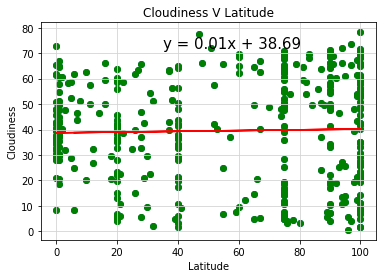

In [27]:
northern= weather[weather['Hemisphere']=="Northern Hemisphere"]
x_values = northern['Cloudiness']
y_values = northern['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(35,72),fontsize=15,color="black")
correlation = st.pearsonr(x_values,y_values)
plt.scatter(northern["Cloudiness"],northern["Lat"], facecolors= "green")
plt.title("Cloudiness V Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../outputs/Cloudiness_lat.png")
print (f"The r-squared is: {round(correlation[0],2)}")
plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.1


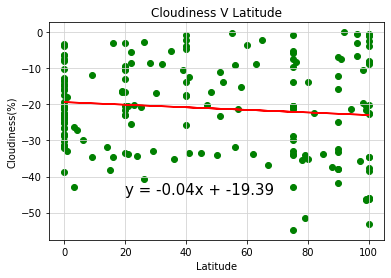

In [28]:
southern= weather[weather['Hemisphere']=="Southern Hemisphere"]
x_values = southern['Cloudiness']
y_values = southern['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, facecolors= "green")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,-45),fontsize=15,color="black")
correlation = st.pearsonr(x_values,y_values)

plt.title("Cloudiness V Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../outputs/Cloud_S_lat.png")
print (f"The r-squared is: {round(correlation[0],2)}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.02


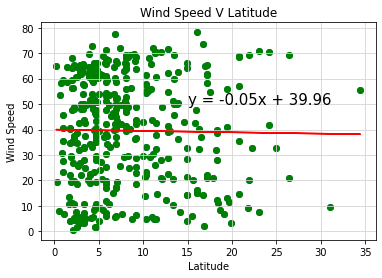

In [29]:
northern= weather[weather['Hemisphere']=="Northern Hemisphere"]
x_values = northern['Wind Speed']
y_values = northern['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,50),fontsize=15,color="black")
correlation = st.pearsonr(x_values,y_values)
plt.scatter(northern["Wind Speed"],northern["Lat"], facecolors= "green")
plt.title("Wind Speed V Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../outputs/Wind Speed_lat.png")
print (f"The r-squared is: {round(correlation[0],2)}")
plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.17


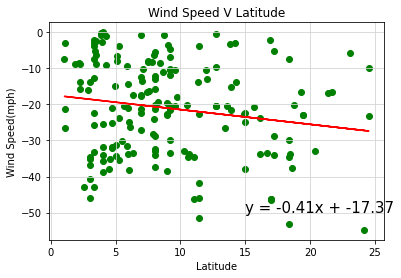

In [30]:
southern= weather[weather['Hemisphere']=="Southern Hemisphere"]
x_values = southern['Wind Speed']
y_values = southern['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, facecolors= "green")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,-50),fontsize=15,color="black")
correlation = st.pearsonr(x_values,y_values)

plt.title("Wind Speed V Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../outputs/Wind Speed_S_lat.png")
print (f"The r-squared is: {round(correlation[0],2)}")
plt.show()